In [40]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv("cleaned_data_v2.csv")
data.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BP Category
0,0,M,168,62.0,110.0,80.0,1,1,0,0,1,0,50,21.967120,Normal
1,1,F,156,85.0,140.0,90.0,3,1,0,0,1,1,55,34.927679,High Blood Pressure Stage 2
2,2,F,165,64.0,130.0,70.0,3,1,0,0,0,1,51,23.507805,High Blood Pressure Stage 1
3,3,M,169,82.0,150.0,100.0,1,1,0,0,1,1,48,28.710479,High Blood Pressure Stage 2
4,4,F,156,56.0,100.0,60.0,1,1,0,0,0,0,47,23.011177,Normal


In [4]:
X = data.drop(columns = ["cardio", "id"]) 

In [5]:
y = data["cardio"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
X_train.select_dtypes(exclude="number")

,gender,BP Category
47339,F,High Blood Pressure Stage 1
67456,F,High Blood Pressure Stage 2
12308,F,Normal
32557,F,High Blood Pressure Stage 1
664,M,Normal
...,...,...
37194,F,High Blood Pressure Stage 2
6265,M,Normal
54886,M,Normal
860,F,Normal


In [8]:
clf_v1 = HistGradientBoostingClassifier(categorical_features = ["gender", "BP Category"], random_state=42).fit(X_train, y_train)

In [9]:
clf_v1.score(X_test, y_test) # returns accuracy

0.7342857142857143

In [10]:
print(classification_report(y_test, clf_v1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6968
           1       0.75      0.70      0.73      7032

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



In [11]:
imp = permutation_importance(clf_v1, X_test, y_test, n_repeats=10, random_state=42)

In [12]:
imp.importances_mean

array([ 5.07142857e-04, -7.28571429e-04,  1.11428571e-03,  1.48771429e-01,
        2.05000000e-03,  3.35000000e-02,  5.07142857e-04,  5.92857143e-04,
       -9.28571429e-05,  3.07142857e-03,  2.72000000e-02,  1.11428571e-03,
        5.85714286e-04])

In [13]:
df_importances = pd.DataFrame(imp.importances.transpose(),
                             columns=list(X.columns))

In [14]:
#df_importances.to_csv("feature_importances.csv", index=False)

In [15]:
imp.importances_std

array([0.00035492, 0.00046708, 0.00077077, 0.00399116, 0.00113031,
       0.0015263 , 0.00026812, 0.00039389, 0.00032111, 0.00072281,
       0.00210316, 0.00086791, 0.00044584])

In [16]:
# https://stackoverflow.com/questions/7267226/range-for-floats
param_grid = {
    'learning_rate': [x / 10.0 for x in range(1, 10, 1)],
    'max_iter': list(range(50, 150, 10)),
    'max_leaf_nodes': list(range(25, 37, 1))
}

In [17]:
#hgbc = HistGradientBoostingClassifier(categorical_features = ["gender", "BP Category"], random_state=42)
#grid_results = GridSearchCV(hgbc, param_grid)
#grid_results.fit(X_train, y_train)

In [18]:
#print("Best tuned parameters: ", grid_results.best_params_)
#print("Best tuned score: ", grid_results.best_score_)

In [19]:
hgbc_v2 = hgbc = HistGradientBoostingClassifier(categorical_features = ["gender", "BP Category"], random_state=42,
                                               max_iter = 50, max_leaf_nodes = 29)

In [20]:
hgbc_v2.fit(X_train, y_train)

HistGradientBoostingClassifier(categorical_features=['gender', 'BP Category'],
                               max_iter=50, max_leaf_nodes=29, random_state=42)

In [21]:
hgbc_v2.score(X_test, y_test)

0.736

In [22]:
print(classification_report(y_test, hgbc_v2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6968
           1       0.76      0.70      0.73      7032

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [27]:
not_null = data[data.notnull().all(axis=1)].iloc[:, 1:]

In [28]:
not_null

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BP Category
0,M,168,62.0,110.0,80.0,1,1,0,0,1,0,50,21.967120,Normal
1,F,156,85.0,140.0,90.0,3,1,0,0,1,1,55,34.927679,High Blood Pressure Stage 2
2,F,165,64.0,130.0,70.0,3,1,0,0,0,1,51,23.507805,High Blood Pressure Stage 1
3,M,169,82.0,150.0,100.0,1,1,0,0,1,1,48,28.710479,High Blood Pressure Stage 2
4,F,156,56.0,100.0,60.0,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68675,M,168,76.0,120.0,80.0,1,1,1,0,1,0,52,26.927438,Normal
68676,F,158,126.0,140.0,90.0,2,2,0,0,1,1,61,50.472681,High Blood Pressure Stage 2
68677,M,183,105.0,180.0,90.0,3,1,0,1,0,1,52,31.353579,High Blood Pressure Stage 2
68678,F,163,72.0,135.0,80.0,1,2,0,0,0,1,61,27.099251,High Blood Pressure Stage 1


In [29]:
X_nn = not_null.drop(columns="cardio")
y_nn = not_null["cardio"]

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42)

In [30]:
clf_nn = HistGradientBoostingClassifier(categorical_features = ["gender", "BP Category"], random_state=42).fit(X_train_nn, y_train_nn)

In [31]:
clf_nn.score(X_test_nn, y_test_nn)

0.734784507862551

In [32]:
print(classification_report(y_test_nn, clf_nn.predict(X_test_nn)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6831
           1       0.76      0.69      0.72      6905

    accuracy                           0.73     13736
   macro avg       0.74      0.74      0.73     13736
weighted avg       0.74      0.73      0.73     13736



In [33]:
# tune hyperparameters for the HGBC w/o nulls 
hgbc_nn = HistGradientBoostingClassifier(categorical_features = ["gender", "BP Category"], random_state=42)
grid_results_nn = GridSearchCV(hgbc_nn, param_grid)
grid_results_nn.fit(X_train_nn, y_train_nn)

GridSearchCV(estimator=HistGradientBoostingClassifier(categorical_features=['gender',
                                                                            'BP '
                                                                            'Category'],
                                                      random_state=42),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'max_iter': [50, 60, 70, 80, 90, 100, 110, 120, 130,
                                      140],
                         'max_leaf_nodes': [25, 26, 27, 28, 29, 30, 31, 32, 33,
                                            34, 35, 36]})

In [34]:
print("Best tuned parameters: ", grid_results_nn.best_params_)
print("Best tuned score: ", grid_results_nn.best_score_)

Best tuned parameters:  {'learning_rate': 0.1, 'max_iter': 60, 'max_leaf_nodes': 33}
Best tuned score:  0.7362769262296018


In [35]:
hgbc_nn_best = HistGradientBoostingClassifier(categorical_features = ["gender", "BP Category"], random_state=42, max_iter=60, max_leaf_nodes=33)
hgbc_nn_best.fit(X_train_nn, y_train_nn)

HistGradientBoostingClassifier(categorical_features=['gender', 'BP Category'],
                               max_iter=60, max_leaf_nodes=33, random_state=42)

In [38]:
precision_score(y_test_nn, hgbc_nn_best.predict(X_test_nn))

0.7556791104050834

In [39]:
recall_score(y_test_nn, hgbc_nn_best.predict(X_test_nn))

0.6889210716871832

In [41]:
accuracy_score(y_test_nn, hgbc_nn_best.predict(X_test_nn))

0.7316540477577169

In [74]:
roc_auc_score(y_test_nn, hgbc_nn_best.predict_proba(X_test_nn)[:, 1])

0.8006959583133119

In [43]:
precision_score(y_test, hgbc_v2.predict(X_test))

0.7566153846153846

In [44]:
recall_score(y_test, hgbc_v2.predict(X_test))

0.6993742889647326

In [45]:
accuracy_score(y_test, hgbc_v2.predict(X_test))

0.736

In [72]:
roc_auc_score(y_test, hgbc_v2.predict_proba(X_test)[:, 1])

0.7994366045527156

In [47]:
imp_nn = permutation_importance(hgbc_nn_best, X_test_nn, y_test_nn, n_repeats=10, random_state=42)

In [58]:
# compute feature importance matrix for data w/o null values
imp_nn_mat = pd.DataFrame(imp_nn.importances_mean.transpose(), X_test_nn.columns)

In [71]:
X_train_nn.shape[0]+X_test_nn.shape[0]

68680

In [65]:
# find the top feature importances 
imp_nn_mat.sort_values(by=0, ascending=False)

,0
ap_hi,0.140485
cholesterol,0.032011
age_years,0.029310
ap_lo,0.003888
active,0.001638
smoke,0.001216
gender,0.001012
alco,0.000721
BMI,0.000713
gluc,0.000167


In [75]:
# function borrowed from https://www.w3schools.com/python/python_ml_auc_roc.asp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

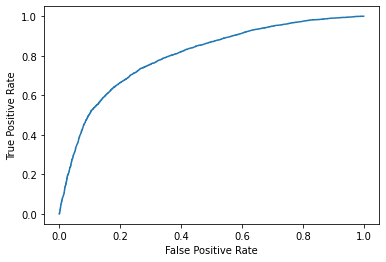

In [78]:
plot_roc_curve(y_test_nn, hgbc_nn_best.predict_proba(X_test_nn)[:, 1])